# Shaun Pritchard

### Cryptography
### Public key cryptography
### Diffie-Hellman Key Exchange + ElGamal Encryption

Formuation of propositions, lemmas, definitions comes from:
**Introduction to modern cryptography** by *Jonathan Katz* and *Yehuda Lindell*

To see the notebook as a slide-show, use [RISE](https://rise.readthedocs.io/en/stable/)

In [ ]:
import math
import random
from sympy import randprime, isprime, Mod
import hashlib

**Proposition 7.2** Let $a, b$ be positive integers. Then there exists integers $X, Y$ such that $Xa + Yb = \gcd(a, b)$. 

Furthermore, $\gcd(a, b)$ is the smallest positive integer that can be expressed in this way.

In [ ]:
def egcd(a, b):
    x,y, u,v = 0,1, 1,0
    while a != 0:
        q, r = b//a, b%a
        m, n = x-u*q, y-v*q
        b,a, x,y, u,v = a,r, u,v, m,n
    gcd = b
    return gcd, x, y

In [ ]:
a = 10
b = 21

gcd, x, y = egcd(a, b)

In [ ]:
print(a, "*", x, "+", b, "*", y, "=", math.gcd(a,b))
a * x + b * y

If for $b$ there exists an integer $b^{-1}$ such that $b b^{-1} = 1 \bmod N$ then we call:

* $b$ invertible

* $b^{-1}$ modular inverse of $b$ modulo $N$

**Proposition 7.7** Let $a, N$ be integers, with $N > 1$. Then $a$ is invertible modulo $N$ if and only if $\gcd(a, N) = 1$.

**Definition 7.9** A group is a set $\mathbf{G}$ along with a binary operation $\oplus$ for which the following conditions hold:

* (Closure:) For all $g, h \in \mathbf{G}$, $g \oplus h \in \mathbf{G}$

* (Existance of an Identity:) There exists an **identity** $e \in \mathbf{G}$ such that for all $g \in \mathcal{G}$, $e \oplus g = g = g \oplus e$.

* (Existence of Inverses:) For all $g \in \mathbf{G}$ there exists an element $h \in \mathbf G$ such that $g \oplus h = e$

* (Associativity:) For all $g_1, g_2, g_3 \in \mathbf{G}$, $(g_1 \oplus g_2) \oplus g_3 = g_1 \oplus (g_2 \oplus g_3)$.

If $\mathbf{G}$ has finite number of elements $\rightarrow \mathbf{G}$ is a *finite group*

$|\mathbf{G}|$ - order of the group - number of elements in $\mathbf{G}$

$\mathbf{G}$ is **abelian** if
for all $g, h \in \mathbf{G}, g \oplus h = h \oplus g$

$Z^+_n = (Z_n, +) = (\{0, 1, \ldots, n-1\}, +_{ \bmod n})$ for $n \geq 2$ is an abelian group of order $|Z_n^+| = n$

$Z_n^* = (\{a: \gcd(a, n) = 1\}, \cdot_{ \bmod n})$. If $n$ is prime:
$Z_p^* = (Z_p, \cdot) = (\{1, \ldots, p-1\}, \cdot_{ \bmod p})$ for $p$ prime is an abelian group of order $|Z_p^*| = p - 1$

$Z_n^* = (\{a: \gcd(a, n) = 1\}, \cdot_{ \bmod n})$. 

Let $n = p \cdot q$, $\qquad p, q$ are primes -- an abelian group of order $|Z_{pq}^*| = (p - 1)(q-1)$

# Cyclic groups

Let $\mathbf{G}$ be a finite group of order $m$.

Let $g \in \mathbf{G}$, consider the set:
$$\langle g \rangle = \{g^0, g^1, \ldots \}$$

From *Theorem 7.14* we have $g^m = 1$.

Let $i \leq m$ be the smallest positive integer for which $g^i = 1$.

Then the sequence repeats after $i$ terms, so:
$$\langle g \rangle = \{g^0, \ldots, g^{i-1}\}$$

The set contains exactly $i$ elements since:

if $g^j = g^k$ with $0 \leq j < k < i$

then $g^{k-j} = 1$ and $0 < k - j < i$ (contradicting choice of $i$).


$G = Z_{11}^*$

$\langle 2 \rangle = \langle 6 \rangle = \langle 7 \rangle = \langle 8 \rangle = G$

Def: A **primitive root** of $G$ is such a $g \in G$ that $\langle g \rangle = G$

$\langle g \rangle$ is a subgroup of $\mathbf{G}$

inverse of $g^x$ is $g^{i-x}$

$Z_n^* = (\{a: \gcd(a, n) = 1\}, \cdot_{ \bmod n})$. 


In [ ]:
def group(n):
    G = []
    m = 0
    for a in range(n):
        if math.gcd(a, n) == 1:
            G.append(a)
            m = m + 1
    return G, m

n = 11
group(n)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 10)

In [ ]:
def subgroup(g, n, m):
    H = {}
    for i in range(m):
        H[(g ** i % n)] = 1
    return H

p = 11
gs = subgroup(2, p, p-1)

print(gs.keys(), len(gs))

dict_keys([1, 2, 4, 8, 5, 10, 9, 7, 3, 6]) 10


In [ ]:
p, q = 11, 13
n, m = p * q, (p-1)*(q-1)
#n = 11
#m = n - 1
print("Group Z",n,"* order: ", m)
#pint(group(n))
for i in range(n):
    if math.gcd(i, n) == 1:
        w = subgroup(i, n, m)
        print("Element ", i, "order:", len(w))
        #print(w.keys())

*Definition 7.48* Let $\mathbf{G}$ be a finite group and $g \in \mathbf{G}$. The **order** of $g$ is the smallest positive integer $i$ with $g^i = 1$.

In [ ]:
def order(g, n):
    o = 1
    while g ** o % n != 1:
        o = o + 1
    return o

order(10, 11)

2

In [ ]:
x = random.randint(2, 2*q - 1)
q = 11
p = 2 * q  + 1
g = x ** 2 % p
print(x, g)
#groupOrder = p - 1
#subgroup orders: divisors of p - 1 = 2q -> 1, 2, q, 2q
print(group(p))
print(order(g, p))
print(list(subgroup(g, p, p-1).keys()))

18 2
([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], 22)
11
[1, 2, 4, 8, 16, 9, 18, 13, 3, 6, 12]


In [ ]:
for g in [3, 9, 4, 12, 13, 16, 2, 6, 18, 8]:
    print(list(subgroup(g, p, p - 1).keys()))
    

[1, 3, 9, 4, 12, 13, 16, 2, 6, 18, 8]
[1, 9, 12, 16, 6, 8, 3, 4, 13, 2, 18]
[1, 4, 16, 18, 3, 12, 2, 8, 9, 13, 6]
[1, 12, 6, 3, 13, 18, 9, 16, 8, 4, 2]
[1, 13, 8, 12, 18, 4, 6, 9, 2, 3, 16]
[1, 16, 3, 2, 9, 6, 4, 18, 12, 8, 13]
[1, 2, 4, 8, 16, 9, 18, 13, 3, 6, 12]
[1, 6, 13, 9, 8, 2, 12, 3, 18, 16, 4]
[1, 18, 2, 13, 4, 3, 8, 6, 16, 12, 9]
[1, 8, 18, 6, 2, 16, 13, 12, 4, 9, 3]


Proposition 7.51 Let $\mathbf{G}$ be a finite group of order $m$, and say $g \in \mathbf{G}$ has order $i$ then $i | m$.


Def. Let $G$ be a group of order $m$, if there exists an element $g \in G$ such that order of $g$ is equal $m$ then we call $g$ a **group generator** and we call $G$ a **cyclic group**.

Corollary 7.52 If $\mathbf{G}$ is a group of prime order $p$, then $\mathbf{G}$ is cyclic.

Furthermore, all elements of $\mathbf{G}$ except the identity are generators of $\mathbf{G}$.

Theorem 7.53 If $p$ is prime then $\mathbf{Z}_p^*$ is cyclic.

$n = p$, $p$ prime; the group order $m = p-1$

what if we find $g$ such that $ord(g)$ is prime?

"recipe":
* $q$ - prime
* $p = 2 q + 1$ be sure that is prime
* then go with $Z_p^*$

In [ ]:
q = 11
p = 2 * q + 1
m = 2 * q
print(q, p)
g = 2
#print(group(p))
print(subgroup(g, p, p-1).keys())
print(order(g, p))

In [ ]:
for g in [2, 4, 8, 16, 9, 18, 13, 3, 6, 12]:
    print(list(subgroup(g, p, p-1).keys()), len(subgroup(g, p, p-1)))

In [ ]:
p = 23
for a in range(2,p-1):
    aa = a ** 2 % p
    print(a, "->", aa, "<",aa,"> = ", list(subgroup(aa, p, p-1)) )

$QR_p^* = \{a: \left(\exists g \in Z_p^*\right) a = g^2 \bmod p\}$

$DLOG_{\mathcal{A}, G}(n)$:
1. Run $\mathcal{G}(1^n)$ to obtain $(G, q, g)$:
    * $\mathcal{G}$ - cyclic group 
    * $q$ - group order
    * $g$ - generator
2. Choose $h \leftarrow \mathcal{G}$
3. $x \leftarrow \mathcal{A}(\mathcal{G}, q, g, h)$
4. Output is $1$ if $g^x = h$

Definintion 7.59 We say that the **discrete logarithm problem is hard relative to $\mathcal{G}$** if for all PPT algorithms $\mathcal{A}$ there exists a negligible function $\mathsf{negl}$ such that 
$$P[DLOG_{\mathcal{A}, G}(n) = 1] \leq \mathsf{negl}.$$

**Computational Diffie-Hellman (CDH)**

Fix a cyclic group $\mathbf{G}$ and a generator $g \in \mathbf{G}$. Given $h_1, h_2$, define
$$DH_g(h_1, h_2) = g^{\log_g h_1 \cdot \log_g h_2}$$

If $X = g^x$ and $Y = g^y$ then 
$$DH_g(X, Y) = g^{x \cdot y} = X^y = Y^x.$$

Definition 7.60 We say that DDH problem is hard relative to $\mathbf{G}$ if for all PPT algorithms $\mathcal{A}$ there exists a negligible function $\mathsf{negl}$ such that
$$\left|P\left[\mathcal{A}(\mathbf{G}, q, g, g^x, g^y, g^z) = 1\right] - P\left[\mathcal{A}(\mathbf{G}, q, g, g^x, g^y, g^{xy}\right) = 1\right| \leq \mathsf{negl},$$
where in each case the probabilities are taken over the experiment in which $\mathcal{G}(1^n)$ outputs $(\mathbf{G}, q, g)$, and then random $x, y, z \in \mathbf{Z}_q$ are chosen.

# Prime-Order Groups

Cyclic groups:

* prime order
* non-prime order

Pohling-Hellman algorithm for Discrete Log

group of order $q = q_1 \cdot q_2 \rightarrow$ Discrete Log Problem in $q_1$ and $q_2$

# Generator generation

In [ ]:
def genSecurePrime(a, b):
    a = False
    while a is False:
        p = randprime(a, b)
        q = 2 * p  + 1
        a = isprime(q)
    return p, q

p, q = genSecurePrime(30, 200)
print(p, q)

191 383


In [ ]:
print("Group: ", group(q))

x = random.randint(2, 2 * p - 1)
print("Random: ", x)
g = x ** 2 % q
print("Random generator: ", g, "?")

S = subgroup(g, q, q -1)
print("Generated subgroup: ", S.keys())
print("(sub)group order: ", len(S))
print(order(g, q))

Group:  ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

# Diffie-Hellman Key Exchange

Diffie Hellman Key Exchange
$G$ - cyclic group of order $p$
$g$ - a group generator

1. Alice:
    * $x \leftarrow_{R} \{1, \ldots, p\}$
    * $X = g^x$
    * $Alice \xrightarrow{X} Bob$
2. Bob:
    * $y \leftarrow_{R} \{1, \ldots, p\}$
    * $Y = g^y$
    * $Alice \xleftarrow{Y} Bob$
3. Alice:
    * $z_a = Y^x = (g^y)^x = g^{y x}$
4. Bob:
    * $z_b = X^y = (g^x)^y = g^{x y}$

**Computational Diffie-Hellman (CDH)**

Fix a cyclic group $\mathbf{G}$ and a generator $g \in \mathbf{G}$. Given $h_1, h_2$, define
$$DH_g(h_1, h_2) = g^{\log_g h_1 \cdot \log_g h_2}$$

If $X = g^x$ and $Y = g^y$ then 
$$DH_g(X, Y) = g^{x \cdot y} = X^y = Y^x.$$

Shared key:
* $k_a = h(z_a)$
* $k_b = h(z_b)$

"Magic":
* $k_a = k_b$

In [ ]:
def genGen(q):
    x = random.randint(2, q - 2)
    return x ** 2 % q

In [ ]:
g = genGen(q)
print(g)
print(order(g, q))

8
191


In [ ]:
def DH_Key_Gen(g, q):
        x = random.randint(1, (q - 1) // 2)
        return x, g ** x % q

In [ ]:
x, X = DH_Key_Gen(g, q) # Alice

y, Y = DH_Key_Gen(g, q) # Bob

za = Y ** x % q # Alice computes

zb = X ** y % q # Bob computes

print(g, q) # Eve knows
print(X, Y) # Eve knows

8 383
346 161


A passive adversary's view:
* $G, g, X, Y$

Security:
* Can an adversary compute $k$?

In [ ]:
ha = hashlib.new('sha3_256')
hb = hashlib.new('sha3_256')

ha.update(za.to_bytes(2, 'big'))
hb.update(zb.to_bytes(2, 'big'))

print(ha.hexdigest())
print(hb.hexdigest())

755e05b471611f06ac2f07123f9011b29eccabe727a9d542d2945efc953ad592
755e05b471611f06ac2f07123f9011b29eccabe727a9d542d2945efc953ad592


# ElGamal encryption

KeyGen($1^n$):
* $p \leftarrow_R \mathbf{Primes}(n)$
* $x \leftarrow_R \{1, \ldots, p-2\}$
* $g \leftarrow PrimitiveRoots(p)$
* $X \leftarrow g^x \bmod p$
privKey = $x$ / pubKey = $p, g, X$

In [ ]:
def gen(sec):
    n = len(sec)
    pp, p = genSecurePrime(2 ** n, 2 ** (n+1) - 1)
    g = 3
    while order(g, p) < (p-2)//2:
        g = random.randint(2, p-1)
    x = random.randint(1, p - 2)
    X = (g ** x) % p
    return g, X, p, x
    
def genP(sec, p):
    g = 3
    while order(g, p) < (p-2)//2:
        g = random.randint(2, p-1)
    x = random.randint(1, p - 2)
    X = (g ** x) % p
    return g, X, p, x    
    
    
    
    
    

$Enc(m, pubKey)$:

1. $y \leftarrow_R \{1, \ldots, p - 2\}$
2. return $(g^y, m X^y)$

In [ ]:
def enc(m, pub_key):
    g, X, p = pub_key
    y = random.randint(1, p-2)
    Y = g ** y % p
    return Y, m * (X ** y % p) % p





Dec($\alpha, \beta)$, privKey, pubKey):
    
1. a = p - 1 - x
2. return $\alpha^a \beta \bmod p$


$\alpha^a \beta = Y^a m X^y = m g^{y a} g^{x y} = m g^{- y x} g^{x y} = m$

In [ ]:
def dec(c, priv_key):
    g, X, p, x = priv_key
    alpha, beta = c
    a = 2 * p - 2 - x
    return (((alpha ** a) % p) * beta) % p

In [ ]:
g, X, p, x = gen("111111")

print(g, X, p, x)

3 57 107 96


In [ ]:
p = 107
g, X, p, x = genP("asd", p)
print(g, X, p, x)

#plaintext = random.randint(1, p-1)
#print(plaintext)
plaintext = 73


3 85 107 45


In [ ]:
ct = enc(plaintext, [g, X, p])
print(ct)



(2, 10)


In [ ]:
decrypted = dec(ct, [g, X, p, x])
print(decrypted)

80


In [ ]:
x, y = [], []
t = 2000
for i in range(t):
    ct = enc(plaintext, [g, X, p])
    xa, ya = ct
    x.append(xa)
    y.append(ya)
    
    
    
    


Text(0, 0.5, 'Counts')

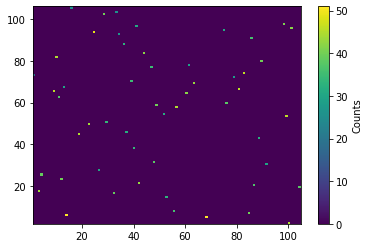

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
#plt.plot(x, y, '.r')
plt.hist2d(x, y, bins=(p, p))
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

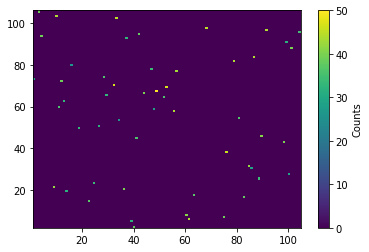

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
#plt.plot(x, y, '.r')
plt.hist2d(x, y, bins=(p, p))
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

# Generalized ElGamal

1. multiplicative group $Z_p^*$
2. multiplicative group $F_{2^m}^*$ of the finite field $F_{2^m}$ of characteristic two
3. group of points on an elliptic curve over a finite field
4. multiplicative group $F_q^*$ of the finite field $F_q$ where $q = p^m$, $p$ is a prime
5. the group of units $Z_n^*$ where $n$ is a composite integer
6. the jacobian of a hyperelliptic curve defined over a finite field
7. the class group of an imaginary quadratic number field


# Cryptographic commitments

## Example

### Coin tossing over the internet

Participants:

* $\mathcal{A}$
* $\mathcal{B}$

Goal:

* select uniformly at random a bit $b \leftarrow_R \{0, 1\}$

Naive apprach (does not work):

1. $\mathcal{A}(b_{\mathcal{A}}) \xrightarrow{b_{\mathcal{A}}} \mathcal{B}$
2. $\mathcal{A} \xleftarrow{b_{\mathcal{B}}} \mathcal{B}(b_{\mathcal{B}})$
3. both compute $b = b_{\mathcal{A}} \oplus b_{\mathcal{B}}$



Why it is not secure? 

What does secure mean in this context?






1. $\mathcal{A}:$ commits to $b_{\mathcal{A}}$, sends $c =$ Comm($b_{\mathcal{A}}, r$) to $\mathcal{B}$

$\mathcal{A} \xrightarrow{c} \mathcal{B}$

$\mathcal{A}$'s security perspective: is $b_{\mathcal{A}}$ **hidding** value of $x$?

2. $\mathcal{A} \xleftarrow{b_{\mathcal{B}}} \mathcal{B}$

3. $\mathcal{A} \xrightarrow{r, b_{\mathcal{A}}} \mathcal{B}$

$\mathcal{B}$'s security concerns:

* $\mathcal{A}$ may leave the protocol after step 2
* $\mathcal{A}$ may send a different $r, b_{\mathcal{A}}$ then the one he commited to. Is commitment scheme **binding**?

# Oblivious transfer